In [1]:
#https://youtu.be/TSfdvQ0ARwI
"""

Dataset from: https://www.kaggle.com/rakannimer/air-passengers
International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

Stat library: https://www.statsmodels.org/stable/index.html
Need version 0.11 or later..
pip install statsmodels --upgrade

For pmdarima:
pip install pmdarima
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')

# load the dataset
df = pd.read_excel(r'C:\all\data\monotonic_pred_force.xlsx')
print(df.dtypes)


Force       float64
specimen     object
dtype: object


In [1]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/614.7 kB 2.6 MB/s eta 0:00:01
   ------------------------------- -------- 481.3/614.7 kB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------- ----------------------------- 0.8/2.8 MB 15.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.8 MB 16.3 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 20.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Force    float64
dtype: object


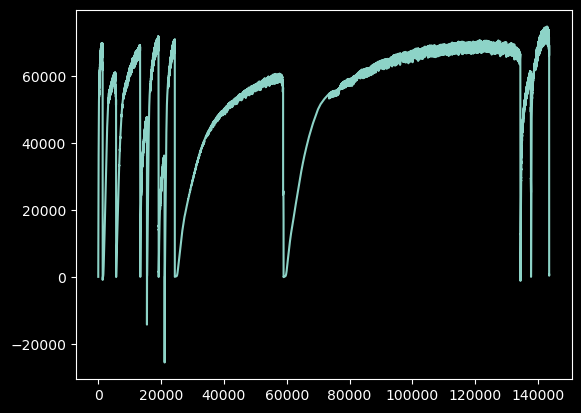

In [2]:
df = df.drop('specimen', axis=1)
print(df.dtypes)

#df.set_index('Month', inplace=True) 

plt.plot(df['Force'])

In [6]:
#Is the data stationary?
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)
#Not stationary...

#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA



pvalue =  6.193454595483908e-07  if above 0.05, data is not stationary


In [3]:
df['Timestamp'] = pd.to_datetime(df.index, unit='s')

# Set the datetime column as the index
df.set_index('Timestamp', inplace=True)      
df

,Force
Timestamp,
1970-01-01 00:00:00,-0.031789
1970-01-01 00:00:01,473.515200
1970-01-01 00:00:02,1127.513000
1970-01-01 00:00:03,1758.178000
1970-01-01 00:00:04,2352.635000
...,...
1970-01-02 15:52:53,343.525000
1970-01-02 15:52:54,447.425000
1970-01-02 15:52:55,479.375000


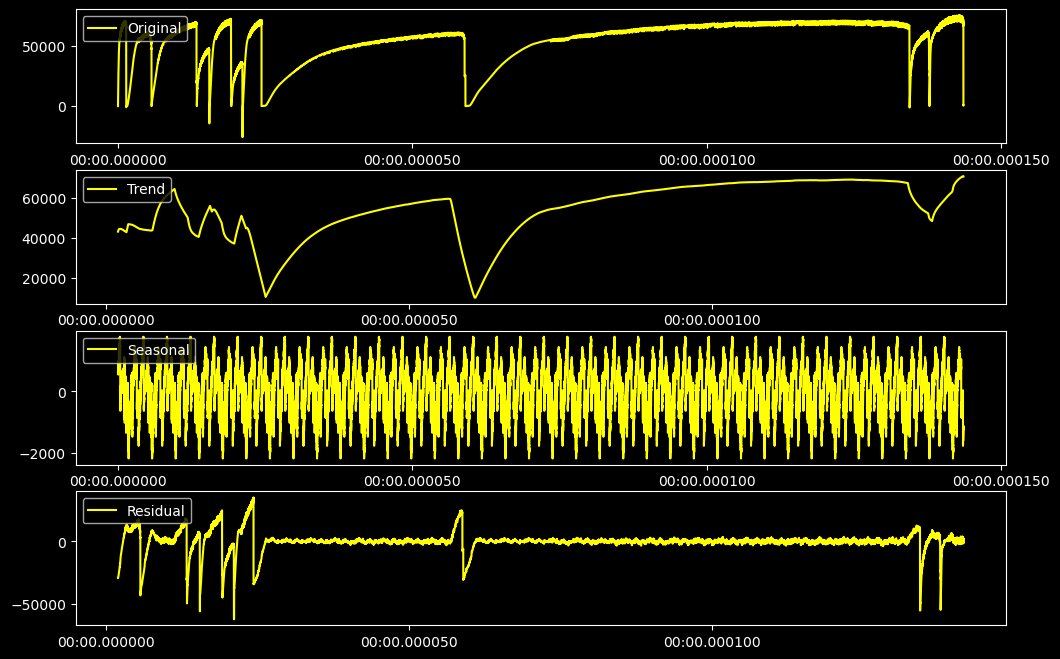

In [11]:


#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Force'],  
                            model ='additive',  period=4000)

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()


In [4]:
#We can go through the exercise of making the data stationary and performing ARIMA
#Or let auto_arima provide the best model (e.g. SARIMA) and parameters. 
#Auto arima suggests best model and parameters based on 
#AIC metric (relative quality of statistical models)

from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df['Force'], start_p = 1, d=1, start_q = 1, 
                          max_p = 50, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           
  
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(0, 1, 1)x(2, 1, [], 12)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2277007.901, Time=5.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2279561.531, Time=2.59 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2240353.931, Time=41.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=98.89 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2277080.649, Time=3.22 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2225002.335, Time=106.78 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2216365.002, Time=263.66 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=2210827.558, Time=505.58 sec


MemoryError: Unable to allocate 5.86 GiB for an array with shape (74, 74, 143579) and data type float64

In [30]:
import pmdarima as pm

In [31]:
   
SARIMAX_model = pm.auto_arima(df[['Force']], exogenous=df.index,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

KeyboardInterrupt: 

C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\bensid28\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Train Score: 433.51 RMSE
Test Score: 23353.79 RMSE


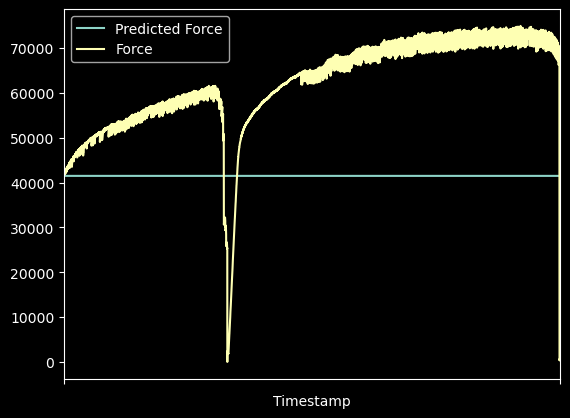

In [32]:





#Split data into train and test
size = int(len(df) * 0.94)
X_train, X_test = df[0:size], df[size:len(df)]

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['Force'],  
                order = (10, 1, 1) 
                ) 
  
result = model.fit() 
result.summary() 


#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

#Prediction
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index).rename('Predicted Force') 
#Rename the column

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['Force'].plot(legend = True) 


import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

#from sklearn.metrics import r2_score
#score = r2_score(X_test, prediction)
#print("R2 score is: ", score)




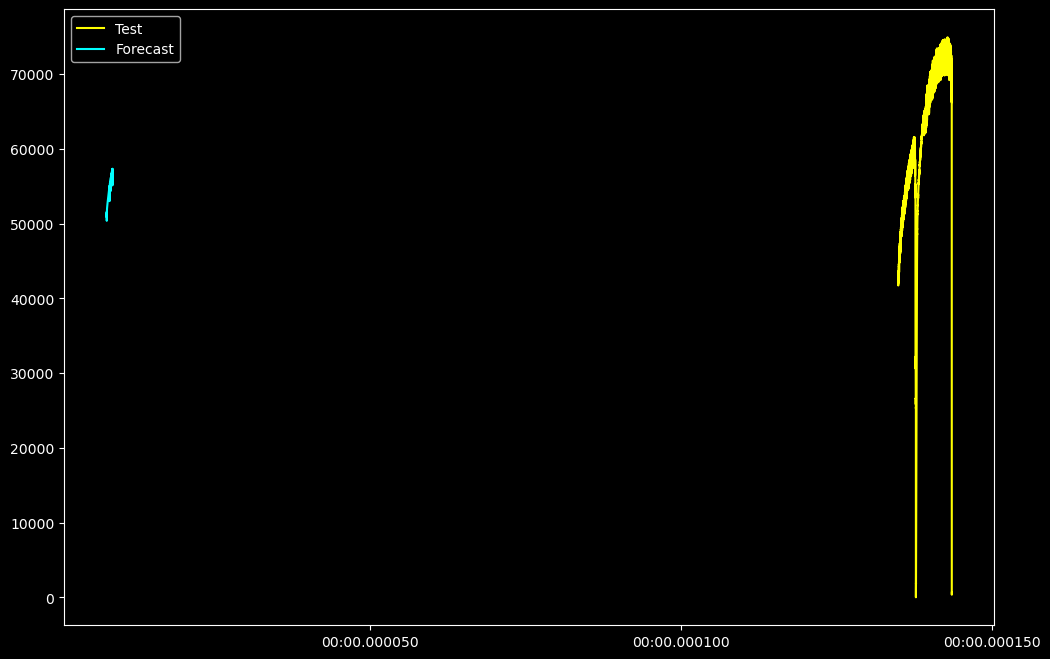

In [41]:
#Forecast.. You can re-train on the entire dataset before forecasting
#For now let us use the trained model
# Forecast for the next 3 years 
forecast = result.predict(start = len(X_test)-1000,  
                          end = (len(X_test)) ,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
#plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend()
plt.show()

##################